In [5]:
import numpy as np
from nn import nn, io, preprocess

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay

import matplotlib as mpl
import matplotlib.pyplot as plt

In [6]:
architecture = [{'input_dim': 4000, 'output_dim': 2000, 'activation': 'relu'}, 
                {'input_dim': 2000, 'output_dim': 1000, 'activation': 'relu'},
                {'input_dim': 1000, 'output_dim': 500, 'activation': 'relu'},
                {'input_dim': 500, 'output_dim': 250, 'activation': 'relu'},
                {'input_dim': 250, 'output_dim': 50, 'activation': 'relu'},
                {'input_dim': 50, 'output_dim': 1, 'activation': 'sigmoid'}]

my_nn = nn.NeuralNetwork(nn_arch=architecture, lr=1, seed=42, batch_size=500, epochs=10, loss_function='bin_ce')

In [7]:
negatives = io.read_fasta_file('data/yeast-upstream-1k-negative.fa')
positives = io.read_text_file('data/rap1-lieb-positives.txt')

seqs, labels = preprocess.sample_seqs(negatives+positives, [False for _ in negatives] + [True for _ in positives])
seqs_1hot = np.array(preprocess.one_hot_encode_seqs(seqs))

labels = [1 if label=='True' else 0 for label in labels]
labels = np.array([labels]).T

In [12]:
# make splits
X_train, X_test, y_train, y_test = train_test_split(seqs_1hot, labels, test_size=0.3, random_state=42, shuffle=True, stratify=None)

In [8]:
# train model
per_epoch_loss_train, per_epoch_loss_val = my_nn.fit(X_train, y_train, X_test, y_test)

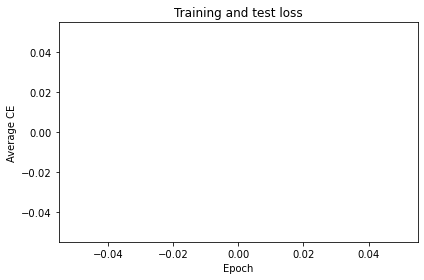

In [9]:
# plot training and test losses across epochs
plt.plot(per_epoch_loss_train)
plt.plot(per_epoch_loss_val)

plt.xlabel('Epoch')
plt.ylabel('Average CE')
plt.title('Training and test loss')
plt.tight_layout()

In [20]:
len(per_epoch_loss_val)

10

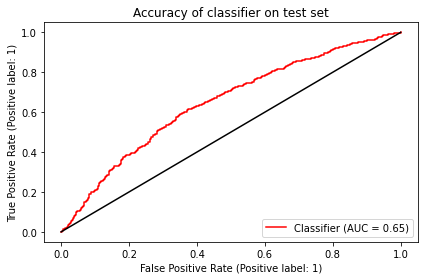

In [10]:
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=my_nn.predict(X_test), color='r')
plt.plot([0,1],[0,1],c='k')
plt.title('Accuracy of classifier on test set')
plt.tight_layout()

In [11]:
lbl_map = {0: 'A', 1: 'T', 2: 'C', 3: 'G'}
mapper = np.vectorize(pyfunc=lambda x: lbl_map[x])
max_seq_len = 10
padded_seq = mapper(np.random.randint(0, high=4, size=max_seq_len))
padded_seq.tolist()

['G', 'A', 'T', 'C', 'C', 'C', 'T', 'A', 'C', 'C']